In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from pprint import pprint
from pathlib import Path

In [2]:
#Raw data file
data_folder_in = (Path("/01_Data_Analytics/Git_Clones/Project1_Group1/\
Resources/"))
file_to_open = data_folder_in / "mortgage_interest_rates.xls"

#Read purchasing file and store into pandas data frame
df_rates = pd.read_excel(file_to_open)

In [3]:
df_rates.head()

,Week,U.S. 30 yr FRM,30 yr fees & points,U.S. 15 yr FRM,15 yr fees & points,U.S. 5/1 ARM,5/1 ARM fees & points,U.S. 5/1 ARM margin,30 yr FRM/ 5/1 ARM spread
0,1971-04-02,7.33,,NaN,NaN,NaN,NaN,NaN,NaN
1,1971-04-09,7.31,,NaN,NaN,NaN,NaN,NaN,NaN
2,1971-04-16,7.31,,NaN,NaN,NaN,NaN,NaN,NaN
3,1971-04-23,7.31,,NaN,NaN,NaN,NaN,NaN,NaN
4,1971-04-30,7.29,,NaN,NaN,NaN,NaN,NaN,NaN


[(0, 20),
 Text(0,0.5,'Interest Rate %'),
 (719619.0, 736929.0),
 Text(0.5,0,'Year'),
 Text(0.5,1,'30 yr FRM Mortgage Interest Rates by Year')]

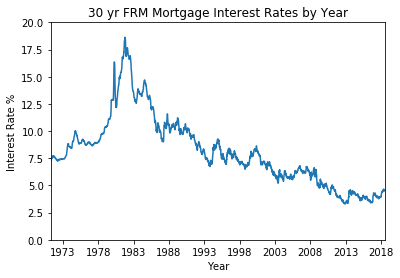

In [4]:
# Create fig and ax
figfrm = plt.figure()
axfrm = plt.axes()

# Use plot, not scatterplot, for efficiency and performance
axfrm.plot(df_rates['Week'], df_rates['U.S. 30 yr FRM'],  ls = '-')

axfrm.set(title = '30 yr FRM Mortgage Interest Rates by Year', 
       ylabel = 'Interest Rate %', 
       xlabel = 'Year', 
       ylim = (0, 20),
       xlim = ('4/2/1971', '8/23/2018'))

In [5]:
#Raw data file
data_folder_in = (Path("/01_Data_Analytics/Git_Clones/Project1_Group1/\
Resources/"))
file_to_open = data_folder_in / "house_hold_report.xlsx"

with pd.ExcelFile(file_to_open) as xls:
    df3 = pd.read_excel(xls, 'Page 3 Data', skiprows = [0,1], nrows = 7) #total debt balance and composition (trillions $)
    df4 = pd.read_excel(xls, 'Page 4 Data', skiprows = [0,1,2], nrows = 4) #number of accounts by loan type (millions)
    df6 = pd.read_excel(xls, 'Page 6 Data', skiprows = [0,1,2]) #mortgage origination volumn by riskscore (billions $)
    df12 = pd.read_excel(xls, 'Page 12 Data', skiprows = [0,1,2], nrows = 7) #% of balance 90+ days delinquent by loan type (%)
    df13 = pd.read_excel(xls, 'Page 13 Data', skiprows = [0,1], nrows = 7) #new delinquent balances by loan type (%)
    df17 = pd.read_excel(xls, 'Page 17 Data', skiprows = [0,1], nrows = 2) #number of consumers with new foreclosures and bankruptcies (Thousands)
    df24 = pd.read_excel(xls, 'Page 24 Data', skiprows = [0,1], nrows = 12) #% of mortgage debt 90+ days late by state (%)
    
quarters = ['Period',
          'Q103', 'Q203', 'Q303', 'Q403', 
          'Q104', 'Q204', 'Q304', 'Q404',
          'Q105', 'Q205', 'Q305', 'Q405',
          'Q106', 'Q206', 'Q306', 'Q406',
          'Q107', 'Q207', 'Q307', 'Q407',
          'Q108', 'Q208', 'Q308', 'Q408',
          'Q109', 'Q209', 'Q309', 'Q409',
          'Q110', 'Q210', 'Q310', 'Q410',
          'Q111', 'Q211', 'Q311', 'Q411',
          'Q112', 'Q212', 'Q312', 'Q412',
          'Q113', 'Q213', 'Q313', 'Q413',
          'Q114', 'Q214', 'Q314', 'Q414',
          'Q115', 'Q215', 'Q315', 'Q415',
          'Q116', 'Q216', 'Q316', 'Q416',
          'Q117', 'Q217', 'Q317', 'Q417',
          'Q118', 'Q218']
    

In [6]:
df_debt = df3.drop(df3.columns[[1,2]], axis = 1)
df_debt.columns = quarters
df_debt = df_debt.set_index('Period')
df_debt = df_debt.transpose()
#df_debt = df_debt.reset_index()

df_debt.head()

Period,Mortgage,HE Revolving,Auto Loan,Credit Card,Student Loan,Other,Total
Q103,4.942,0.242,0.641,0.688,0.2407,0.4776,7.2313
Q203,5.080,0.260,0.622,0.693,0.2429,0.4860,7.3839
Q303,5.183,0.269,0.684,0.693,0.2488,0.4773,7.5551
Q403,5.660,0.302,0.704,0.698,0.2529,0.4486,8.0655
Q104,5.840,0.328,0.720,0.695,0.2598,0.4465,8.2893


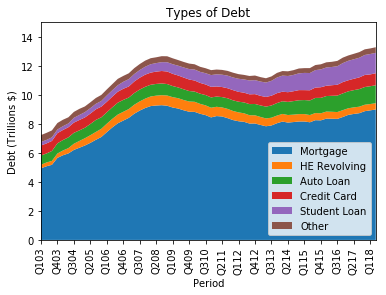

In [7]:
# Create fig and ax
figdebt = plt.figure()
axdebt = plt.axes()

labels = list(df_debt)
axdebt.stackplot(df_debt.index, df_debt['Mortgage'],
                 df_debt['HE Revolving'],
                 df_debt['Auto Loan'],
                 df_debt['Credit Card'],
                 df_debt['Student Loan'],
                 df_debt['Other'], labels = labels)

axdebt.set(title = 'Types of Debt', 
       ylabel = 'Debt (Trillions $)', 
       xlabel = 'Period', 
       ylim = (0, 15),
       xlim = ('Q103', 'Q218'))
axdebt.set_xticks(axdebt.get_xticks()[::3])
axdebt.set_xticklabels(labels = quarters[1::3], rotation = 90)
axdebt.legend(loc = 'lower right')

# SHOULD WE ADD POPULATION GROWTH TO GET AN ESTIMATE OF PER CAPITA DEBT???

In [8]:
df_account = df4
df_account.columns = quarters
df_account = df_account.set_index('Period')
df_account = df_account.transpose()

df_account.head()

Period,Auto Loan,Credit Card,Mortgage,HE Revolving
Q103,73.51,469.81,79.54,13.41
Q203,70.76,468.94,79.73,14.22
Q303,75.94,457.64,79.34,15.55
Q403,77.64,452.71,83.42,16.10
Q104,79.22,449.62,83.95,16.73


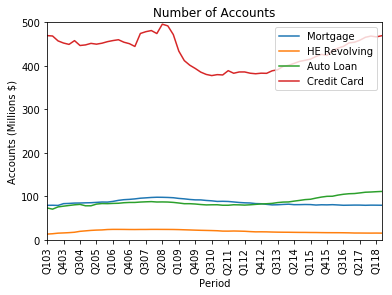

In [39]:
# Create fig and ax
figaccount = plt.figure()
axaccount = plt.axes()

# Use plot, not scatterplot, for efficiency and performance
axaccount.plot(df_account.index, df_account['Mortgage'],  ls = '-')
axaccount.plot(df_account.index, df_account['HE Revolving'],  ls = '-')
axaccount.plot(df_account.index, df_account['Auto Loan'],  ls = '-')
axaccount.plot(df_account.index, df_account['Credit Card'],  ls = '-')

axaccount.set(title = 'Number of Accounts', 
       ylabel = 'Accounts (Millions $)', 
       xlabel = 'Period', 
       ylim = (0, 500),
       xlim = ('Q103', 'Q218'))
axaccount.set_xticks(axaccount.get_xticks()[::3])
axaccount.set_xticklabels(labels = quarters[1::3], rotation = 90)
axaccount.legend(loc = 'upper right')

In [33]:
df_credit = df6.drop(df6.iloc[:,6:11], axis = 1)
df_credit = df_credit.rename(columns = {'Unnamed: 0':'Period#'})
df_credit['Period'] = quarters[1:]
df_credit = df_credit.set_index('Period')
df_credit = df_credit[['<620', '620-659', '660-719', '720-759', '760+']]

df_credit.head()

,<620,620-659,660-719,720-759,760+
Period,,,,,
Q103,72.19,68.12,188.33,336.10,304.24
Q203,71.41,70.53,203.73,352.85,316.03
Q303,78.15,81.23,215.70,363.92,324.71
Q403,90.06,86.37,212.36,349.56,289.70
Q104,79.29,63.47,150.00,213.45,150.59


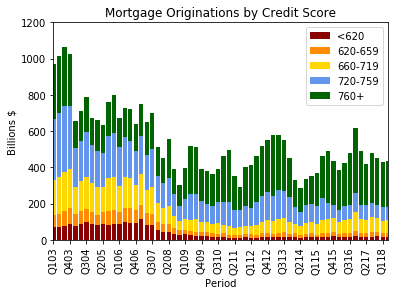

In [38]:
# Create fig and ax
figcredit = plt.figure()
axcredit = plt.axes()

b1 = np.array(df_credit['<620'])
b2 = np.array(df_credit['620-659'])
b3 = np.array(df_credit['660-719'])
b4 = np.array(df_credit['720-759'])
b5 = np.array(df_credit['760+'])

axcredit.bar(df_credit.index, b1, color = 'darkred')
axcredit.bar(df_credit.index, b2, bottom = b1, color = 'darkorange')
axcredit.bar(df_credit.index, b3, bottom = b1 + b2, color = 'gold')
axcredit.bar(df_credit.index, b4, bottom = b1 + b2 + b3, color = 'cornflowerblue')
axcredit.bar(df_credit.index, b5, bottom = b1 + b2 + b3 + b4, color = 'darkgreen')

axcredit.set(title = 'Mortgage Originations by Credit Score', 
       ylabel = 'Billions $', 
       xlabel = 'Period', 
       ylim = (0, 1200),
       xlim = ('Q103', 'Q218'))
axcredit.set_xticks(axcredit.get_xticks()[::3])
axcredit.set_xticklabels(labels = quarters[1::3], rotation = 90)
axcredit.legend(('<620', '620-659', '660-719', '720-759', '760+'), loc = 'upper right')

In [10]:
df_90 = df12
df_90.columns = quarters
df_90 = df_90.set_index('Period')
df_90 = df_90.transpose()

df_90.head()

Period,MORTGAGE,HELOC,AUTO,CC,STUDENT LOAN,OTHER,ALL
Q103,1.21,0.35,2.33,8.84,6.129123,7.23,2.566843
Q203,1.14,0.28,2.26,8.90,6.137217,7.13,2.492008
Q303,1.10,0.22,2.16,8.67,6.269695,6.88,2.392867
Q403,1.06,0.31,2.16,9.24,6.231594,7.47,2.352811
Q104,1.01,0.21,2.32,9.27,6.336297,7.68,2.311190


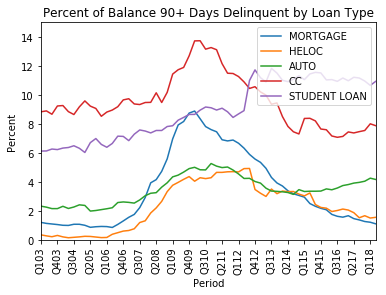

In [41]:
# Create fig and ax
fig90 = plt.figure()
ax90 = plt.axes()

# Use plot, not scatterplot, for efficiency and performance
ax90.plot(df_90.index, df_90['MORTGAGE'],  ls = '-')
ax90.plot(df_90.index, df_90['HELOC'],  ls = '-')
ax90.plot(df_90.index, df_90['AUTO'],  ls = '-')
ax90.plot(df_90.index, df_90['CC'],  ls = '-')
ax90.plot(df_90.index, df_90['STUDENT LOAN'],  ls = '-')

ax90.set(title = 'Percent of Balance 90+ Days Delinquent by Loan Type', 
       ylabel = 'Percent', 
       xlabel = 'Period', 
       ylim = (0, 15),
       xlim = ('Q103', 'Q218'))
ax90.set_xticks(ax90.get_xticks()[::3])
ax90.set_xticklabels(labels = quarters[1::3], rotation = 90)
ax90.legend(loc = 'upper right')

In [43]:
df_new = df13
df_new.columns = quarters
df_new = df_new.set_index('Period')
df_new = df_new.transpose()

df_new.head()

Period,AUTO,CC,MORTGAGE,HELOC,STUDENT LOAN,OTHER,Total
Q103,8.570162,12.321605,5.383374,2.942960,NaN,8.881383,6.635781
Q203,8.497427,12.271632,5.543065,2.677340,NaN,9.132189,6.731470
Q303,8.033501,11.739065,5.272001,2.525812,NaN,9.051247,6.388400
Q403,7.792019,11.560762,5.270055,2.025466,NaN,8.797358,6.269924
Q104,7.418313,10.893744,5.053103,1.933557,7.609623,8.944081,5.955924


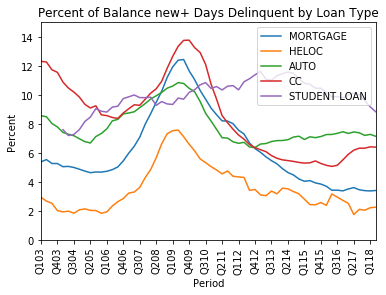

In [45]:
# Create fig and ax
fignew = plt.figure()
axnew = plt.axes()

# Use plot, not scatterplot, for efficiency and performance
axnew.plot(df_new.index, df_new['MORTGAGE'],  ls = '-')
axnew.plot(df_new.index, df_new['HELOC'],  ls = '-')
axnew.plot(df_new.index, df_new['AUTO'],  ls = '-')
axnew.plot(df_new.index, df_new['CC'],  ls = '-')
axnew.plot(df_new.index, df_new['STUDENT LOAN'],  ls = '-')

axnew.set(title = 'Percent of Balance new+ Days Delinquent by Loan Type', 
       ylabel = 'Percent', 
       xlabel = 'Period', 
       ylim = (0, 15),
       xlim = ('Q103', 'Q218'))
axnew.set_xticks(axnew.get_xticks()[::3])
axnew.set_xticklabels(labels = quarters[1::3], rotation = 90)
axnew.legend(loc = 'upper right')

In [12]:
df_foreclose = df17
df_foreclose.columns = quarters
df_foreclose = df_foreclose.set_index('Period')
df_foreclose = df_foreclose.transpose()

df_foreclose.head()

Period,foreclosure,bankruptcy
Q103,203.32,612.26
Q203,169.90,628.66
Q303,178.16,542.44
Q403,193.24,516.02
Q104,186.06,534.90


No handles with labels found to put in legend.


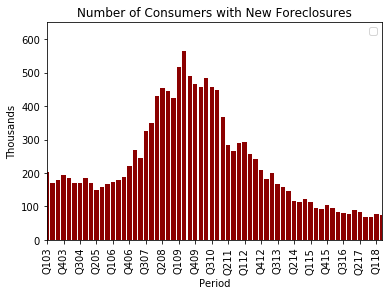

In [49]:
# Create fig and ax
figforeclose = plt.figure()
axforeclose = plt.axes()

axforeclose.bar(df_foreclose.index, df_foreclose['foreclosure'], color = 'darkred')

axforeclose.set(title = 'Number of Consumers with New Foreclosures', 
       ylabel = 'Thousands', 
       xlabel = 'Period', 
       ylim = (0, 650),
       xlim = ('Q103', 'Q218'))
axforeclose.set_xticks(axforeclose.get_xticks()[::3])
axforeclose.set_xticklabels(labels = quarters[1::3], rotation = 90)
axforeclose.legend(loc = 'upper right')

In [13]:
df_state90 = df24
df_state90.columns = quarters
df_state90 = df_state90.set_index('Period')
df_state90 = df_state90.transpose()

df_state90.head()

Period,AZ,CA,FL,IL,MI,NJ,NV,NY,OH,PA,TX,ALL
Q103,1.634965,0.594722,1.306590,1.288175,1.506623,1.780045,1.299475,1.649772,1.529880,1.415040,1.723783,1.208582
Q203,1.357124,0.362121,1.505672,1.569822,1.383357,1.606162,2.118413,1.520663,1.487077,1.134187,1.476392,1.140103
Q303,1.615372,0.431873,0.985858,1.302861,1.288604,1.149925,1.857738,1.457139,1.519217,1.067944,1.369409,1.096232
Q403,1.405617,0.382749,0.995216,1.451363,1.232355,1.270432,2.311648,1.472986,1.626337,0.871272,1.610607,1.057434
Q104,0.946504,0.319836,0.944330,1.275507,1.131415,1.133393,1.828508,1.316973,1.928839,1.053722,1.441940,1.010139


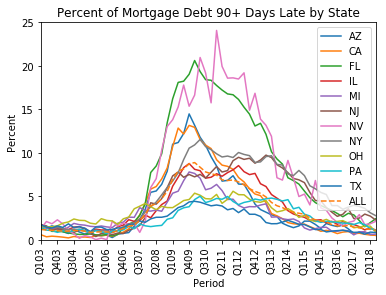

In [51]:
# Create fig and ax
figstate90 = plt.figure()
axstate90 = plt.axes()

# Use plot, not scatterplot, for efficiency and performance
axstate90.plot(df_state90.index, df_state90['AZ'],  ls = '-')
axstate90.plot(df_state90.index, df_state90['CA'],  ls = '-')
axstate90.plot(df_state90.index, df_state90['FL'],  ls = '-')
axstate90.plot(df_state90.index, df_state90['IL'],  ls = '-')
axstate90.plot(df_state90.index, df_state90['MI'],  ls = '-')
axstate90.plot(df_state90.index, df_state90['NJ'],  ls = '-')
axstate90.plot(df_state90.index, df_state90['NV'],  ls = '-')
axstate90.plot(df_state90.index, df_state90['NY'],  ls = '-')
axstate90.plot(df_state90.index, df_state90['OH'],  ls = '-')
axstate90.plot(df_state90.index, df_state90['PA'],  ls = '-')
axstate90.plot(df_state90.index, df_state90['TX'],  ls = '-')
axstate90.plot(df_state90.index, df_state90['ALL'],  ls = '--')

axstate90.set(title = 'Percent of Mortgage Debt 90+ Days Late by State', 
       ylabel = 'Percent', 
       xlabel = 'Period', 
       ylim = (0, 25),
       xlim = ('Q103', 'Q218'))
axstate90.set_xticks(axstate90.get_xticks()[::3])
axstate90.set_xticklabels(labels = quarters[1::3], rotation = 90)
axstate90.legend(loc = 'upper right')